# Assignment 4

For Assignment 4, you are required to complete Exercise 3.13 from the book "An Introduction to Statistical Learning" (ISLP).

**Exercise 3.13** (ISLP).

In this exercise, you will create some simulated data and fit simple linear regression models to it. Ensure you use the default random number generator with the seed set to 1 before starting part (a) to ensure consistent results.

**(a)** Using the `numpy.random.normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from an N(0, 1) distribution. This represents a feature, X.

**(b)** Using the `numpy.random.normal()` method, create a vector, $\epsilon$, containing 100 observations drawn from an N(0, 0.25) distribution—a normal distribution with a mean of zero and a variance of 0.25.

**(c)** Using $x$ and $\epsilon$, generate a vector `y` according to the model: $Y = -1 + 0.5X + \epsilon$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

**(g)** Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.05 .

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.5 .

**(j)** What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

**Extra questions.**

**(e1)** Now create a second variable for the problem $x_2$ that is randomly generated without changing your $y$ model. How many coefficients does your linear regression model have if we use both $x$ and $x_2$ ? What are the values you expect for the different coefficients?

**(e2)** Fit the linear regression model. Do the values of the different coefficients agree with your answer in step **(e1)**?

**(e3)** Now we will use the bootstrapping method in order to train our model several times. To do that, you have to sample B = 10 bootstrap datasets by sampling n=100 points of the original dataset with replacement. Every time we fit the model on the different bootstrap dataset, we take a different estimation of the parameters $\beta_i$, so you will have B different values for each coefficient. Plot the histogram of each parameter. Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step. Increase the number of bootstrap samples B and repeat steps of **e3**. What you observe?

## Solution

In [1]:
import numpy as np
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from typing import List, Tuple, Dict, Callable, Union
from sklearn.utils import resample

In [2]:
np.random.seed(42)

In [3]:
n_examples = 100

In [4]:
n_bins = 20

In [5]:
def scatter_with_lines(x: np.ndarray, y: np.ndarray, lines: list[np.ndarray] = [], labels: list[str] = []):
    fig = sns.scatterplot(x=x[:, 0], y=y[:, 0], label="Datas")
    for line, label in zip(lines, labels):
        fig = sns.lineplot(x=x.flatten(), y=line.flatten(), label=label)
    fig.set(xlabel="x", ylabel="y")
    fig.legend()

In [6]:
def generate_x_epsilon_y(n_examples: int, noise: float = 0.1, coefs: list[float] = [1, 1]):
    x = np.random.normal(0, 1, (n_examples, 1))
    epsilon = np.random.normal(0, noise, (n_examples, 1))
    y = coefs[0] + coefs[1] * x + epsilon
    return x, epsilon, y

In [7]:
def distplot(x: np.ndarray, bins: int = n_bins):
    fig = sns.displot(x=x[:, 0], bins=bins)
    fig.set(xlabel="x", ylabel="y")

**a)** Using the `numpy.random.normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from an N(0, 1) distribution. This represents a feature, X.

In [8]:
b0 = -1
b1 = 0.5
x, epsilon, y = generate_x_epsilon_y(n_examples, noise=0.25, coefs=[b0, b1])

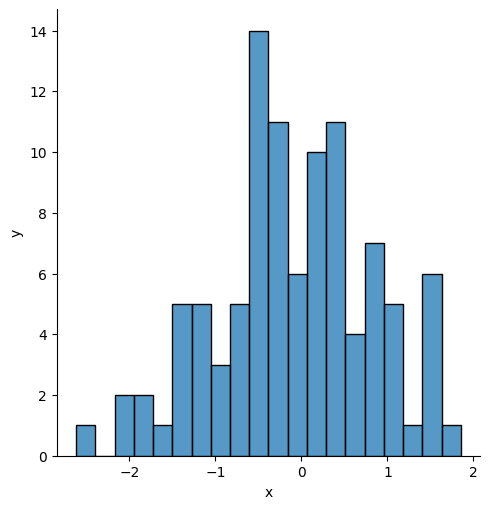

In [9]:
distplot(x)

**(b)** Using the `numpy.random.normal()` method, create a vector, $\epsilon$, containing 100 observations drawn from an N(0, 0.25) distribution—a normal distribution with a mean of zero and a variance of 0.25.

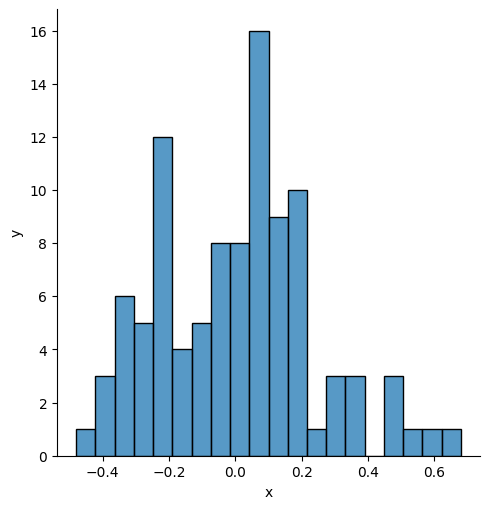

In [10]:
distplot(epsilon)

**(c)** Using $x$ and $\epsilon$, generate a vector `y` according to the model: $Y = -1 + 0.5X + \epsilon$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

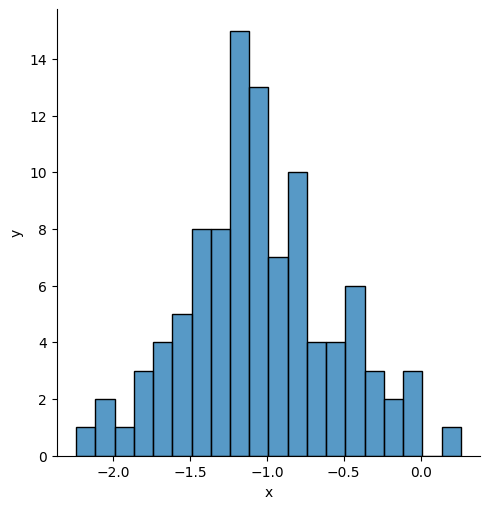

In [11]:
distplot(y)

**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

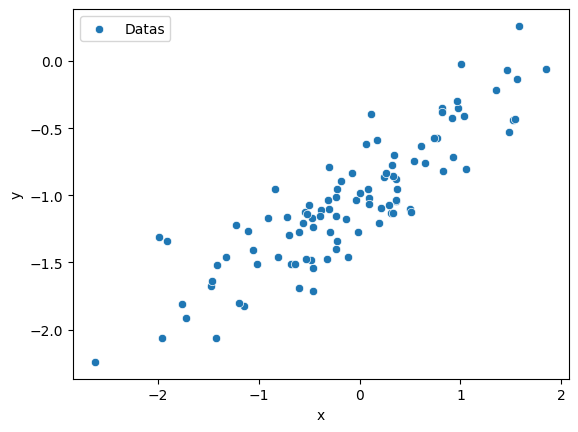

In [12]:
scatter_with_lines(x, y)


**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

In [13]:
def fit_sklearn(x: np.ndarray, y: np.ndarray):
    model = LinearRegression()
    model.fit(x, y)
    score = model.score(x, y)
    b0_hat = model.intercept_
    b_hats = model.coef_
    true_line = b0 + b1 * x
    predicted_line = (b0_hat.flatten() + b_hats.flatten() @ x.T).flatten()
    return model, score, b0_hat, b_hats, true_line, predicted_line

In [14]:
def fit_statsmodels(x: np.ndarray, y: np.ndarray):
    model = OLS(endog=y, exog=np.concatenate([np.ones_like(x), x], axis=1))
    model = model.fit()
    return model

In [15]:
model, score, b0_hat, b_hats, true_line, predicted_line = fit_sklearn(x, y)

In [16]:
print(f"Score: {score}")
print(f"Coef 0 - model: {b0_hat} real: {b0}")
print(f"Coef 1 - model: {b_hats[0]} real: {b1}")

Score: 0.7610892255181196
Coef 0 - model: [-0.99814304] real: -1
Coef 1 - model: [0.46418571] real: 0.5


They are very close, but we see that it's approximated by the model.

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

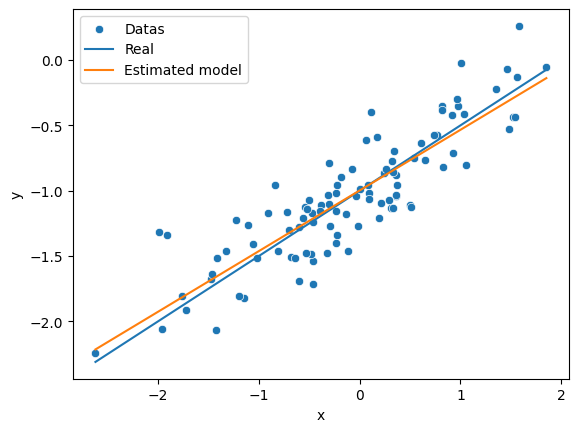

In [17]:
scatter_with_lines(x, y, [true_line, predicted_line], ["Real", "Estimated model"])

In [18]:
fit_statsmodels(x, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.14e-32
Time:                        09:35:59   Log-Likelihood:                 2.9213
No. Observations:                 100   AIC:                            -1.843
Df Residuals:                      98   BIC:                             3.368
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9981      0.024    -41.772      0.000      -1.046      -0.951
x1             0.4642      0.026     17.669      0.000       0.412       0.516
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(g)** Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [19]:
x_with_x2 = np.concatenate([x, x**2], axis=1)
x_with_x2

array([[ 4.96714153e-01,  2.46724950e-01],
       [-1.38264301e-01,  1.91170170e-02],
       [ 6.47688538e-01,  4.19500442e-01],
       [ 1.52302986e+00,  2.31961994e+00],
       [-2.34153375e-01,  5.48278029e-02],
       [-2.34136957e-01,  5.48201146e-02],
       [ 1.57921282e+00,  2.49391312e+00],
       [ 7.67434729e-01,  5.88956064e-01],
       [-4.69474386e-01,  2.20406199e-01],
       [ 5.42560044e-01,  2.94371401e-01],
       [-4.63417693e-01,  2.14755958e-01],
       [-4.65729754e-01,  2.16904203e-01],
       [ 2.41962272e-01,  5.85457409e-02],
       [-1.91328024e+00,  3.66064129e+00],
       [-1.72491783e+00,  2.97534153e+00],
       [-5.62287529e-01,  3.16167266e-01],
       [-1.01283112e+00,  1.02582688e+00],
       [ 3.14247333e-01,  9.87513860e-02],
       [-9.08024076e-01,  8.24507722e-01],
       [-1.41230370e+00,  1.99460174e+00],
       [ 1.46564877e+00,  2.14812631e+00],
       [-2.25776300e-01,  5.09749379e-02],
       [ 6.75282047e-02,  4.56005843e-03],
       [-1.

In [20]:
model, score, b0_hat, b_hats, _, predicted_line = fit_sklearn(x_with_x2, y)

In [21]:
print(f"Score: {score}")
print(f"Coef 0 - model: {b0_hat} real: {b0}")
print(f"Coef 1 - model: {b_hats[0]} real: {b1}")

Score: 0.7722109123605962
Coef 0 - model: [-1.03453529] real: -1
Coef 1 - model: [0.48106418 0.04610749] real: 0.5


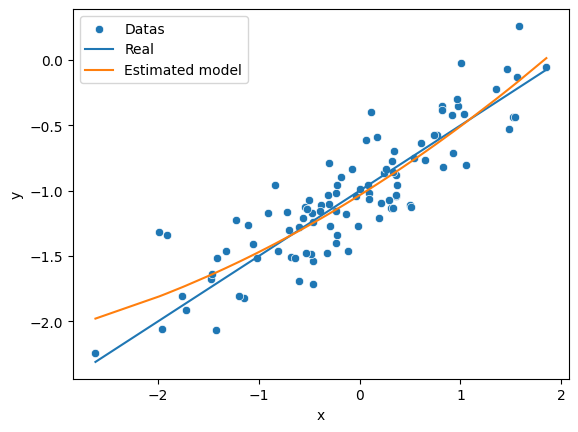

In [22]:
scatter_with_lines(x, y, [true_line, predicted_line], ["Real", "Estimated model"])

In [23]:
fit_statsmodels(x_with_x2, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           6.92e-32
Time:                        09:35:59   Log-Likelihood:                 5.3048
No. Observations:                 100   AIC:                            -4.610
Df Residuals:                      97   BIC:                             3.206
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5173      0.014    -35.917      0.000      -0.546      -0.489
x1            -0.5173      0.014    -35.917      0.000      -0.546      -0.489
x2             0.4811      0.027     17.867      0.000       0.428       0.535
x3             0.0461      0.021      2.176      0.032       0.004       0.088
==============================================================================
Omnibus:                        2.075   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.910
Skew:                           0.239   Prob(JB):                        0.385
Kurtosis:                       2.521   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

It souldn't improve the model since we know that the model should fit data that are linearly distributed.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.05 .

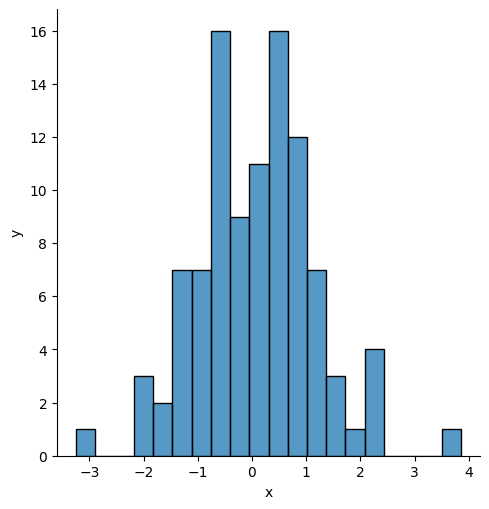

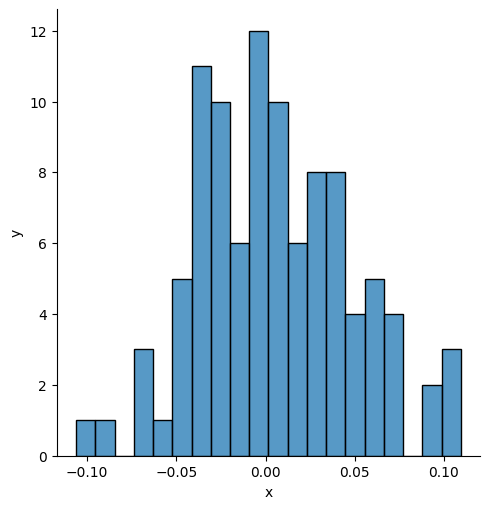

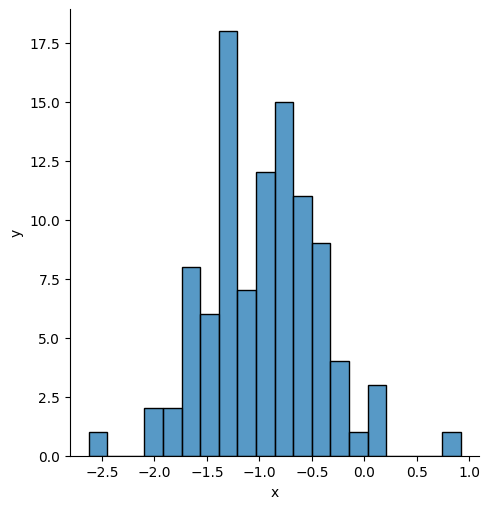

In [24]:
x, epsilon, y = generate_x_epsilon_y(n_examples, noise=0.05, coefs=[b0, b1])

distplot(x)
distplot(epsilon)
distplot(y)

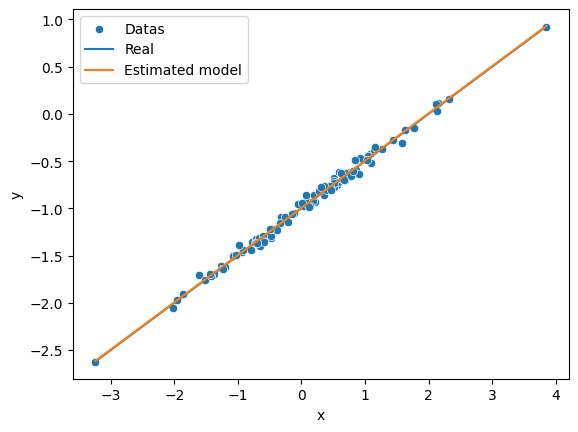

In [25]:
model, score, b0_hat, b_hats, true_line, predicted_line = fit_sklearn(x, y)
scatter_with_lines(x, y, [true_line, predicted_line], ["Real", "Estimated model"])

In [26]:
fit_statsmodels(x, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.20e-108
Time:                        09:36:00   Log-Likelihood:                 170.50
No. Observations:                 100   AIC:                            -337.0
Df Residuals:                      98   BIC:                            -331.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9947      0.004   -223.467      0.000      -1.003      -0.986
x1             0.5000      0.004    121.407      0.000       0.492       0.508
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.876
Skew:                           0.197   Prob(JB):                        0.645
Kurtosis:                       2.765   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.5 .

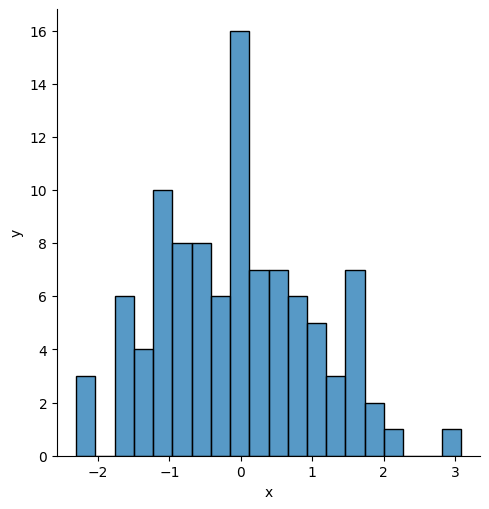

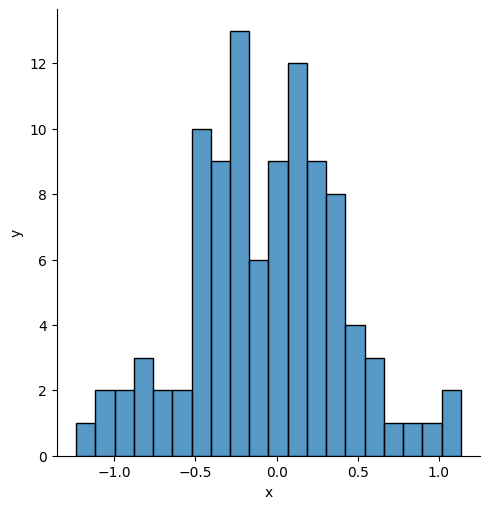

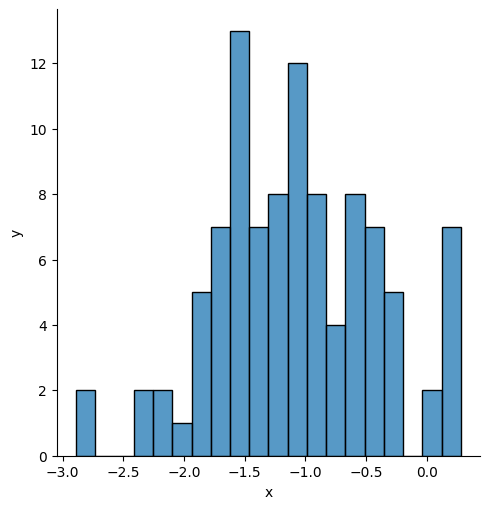

In [27]:
x, epsilon, y = generate_x_epsilon_y(n_examples, noise=0.5, coefs=[b0, b1])

distplot(x)
distplot(epsilon)
distplot(y)

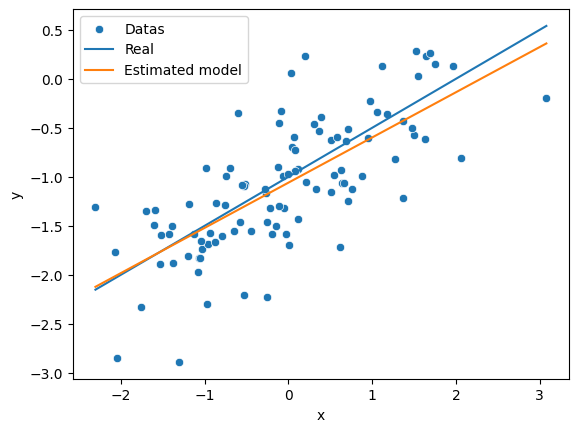

In [28]:
model, score, b0_hat, b_hats, true_line, predicted_line = fit_sklearn(x, y)
scatter_with_lines(x, y, [true_line, predicted_line], ["Real", "Estimated model"])

In [29]:
fit_statsmodels(x, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.30e-18
Time:                        09:36:00   Log-Likelihood:                -63.724
No. Observations:                 100   AIC:                             131.4
Df Residuals:                      98   BIC:                             136.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0598      0.046    -22.894      0.000      -1.152      -0.968
x1             0.4613      0.044     10.563      0.000       0.375       0.548
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.126
Skew:                          -0.045   Prob(JB):                        0.939
Kurtosis:                       3.149   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(e1)** Now create a second variable for the problem $x_2$ that is randomly generated without changing your $y$ model. How many coefficients does your linear regression model have if we use both $x$ and $x_2$ ? What are the values you expect for the different coefficients?

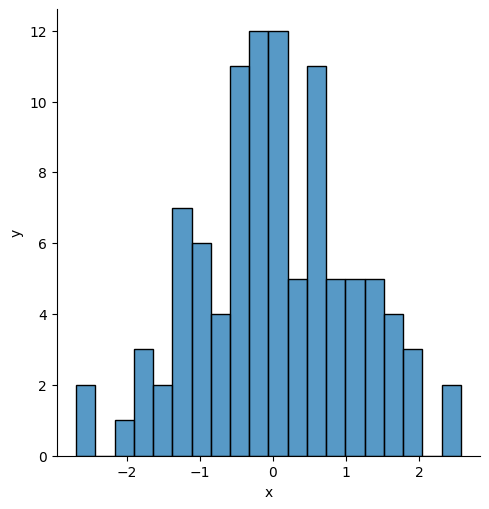

In [30]:
x_2 = np.random.normal(0, 1, (n_examples, 1))
x_2

distplot(x_2)

In [31]:
x = np.concatenate([x, x_2], axis=1)
x

array([[-1.59442766,  0.75698862],
       [-0.59937502, -0.92216532],
       [ 0.0052437 ,  0.86960592],
       [ 0.04698059,  1.35563786],
       [-0.45006547,  0.4134349 ],
       [ 0.62284993,  1.87679581],
       [-1.06762043, -0.7737892 ],
       [-0.14237949, -1.2446547 ],
       [ 0.12029563, -1.77872025],
       [ 0.51443883,  1.49604431],
       [ 0.71161488,  0.65436566],
       [-1.12464209, -0.05558467],
       [-1.53411417,  0.27996863],
       [ 1.27767682, -1.12548905],
       [ 0.33231401,  2.44575198],
       [-0.74848654,  0.12922118],
       [ 1.55115198,  0.10939479],
       [ 0.11567463,  0.72576662],
       [ 1.17929718,  0.48100923],
       [ 0.06751848,  0.22388402],
       [ 2.06074792, -0.79047446],
       [ 1.75534084,  0.47146836],
       [-0.24896415,  1.8820245 ],
       [ 0.97157095,  1.34542005],
       [ 0.64537595,  1.59318663],
       [ 1.36863156, -0.51121568],
       [-0.96492346, -0.98960482],
       [ 0.68605146, -0.12578692],
       [ 1.05842449,

In [32]:
go.Figure(data=[
    go.Scatter3d(x=x[:, 0], y=x[:, 1], z=y[:, 0], mode="markers"),
])

**(e2)** Fit the linear regression model. Do the values of the different coefficients agree with your answer in step **(e1)**?

In [33]:
model, score, b0_hat, b_hats, true_line, predicted_line = fit_sklearn(x, y)

In [34]:
e2_res = fit_statsmodels(x, y)
e2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     55.79
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.48e-17
Time:                        09:36:00   Log-Likelihood:                -63.450
No. Observations:                 100   AIC:                             132.9
Df Residuals:                      97   BIC:                             140.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x1            -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x2             0.4650      0.044     10.552      0.000       0.378       0.553
x3            -0.0321      0.044     -0.731      0.466      -0.119       0.055
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.382
Skew:                          -0.102   Prob(JB):                        0.826
Kurtosis:                       3.224   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**(e3)** Now we will use the bootstrapping method in order to train our model several times. To do that, you have to sample B = 10 bootstrap datasets by sampling n=100 points of the original dataset with replacement. Every time we fit the model on the different bootstrap dataset, we take a different estimation of the parameters $\beta_i$, so you will have B different values for each coefficient. Plot the histogram of each parameter. Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step. Increase the number of bootstrap samples B and repeat steps of **e3**. What you observe?

To do that, you have to sample B = 10 bootstrap datasets by sampling n=100 points of the original dataset with replacement.

In [35]:
df = pd.DataFrame(data=np.concatenate([x, y], axis=1), columns=["x", "x2", "y"])
df

,x,x2,y
0,-1.594428,0.756989,-1.334125
1,-0.599375,-0.922165,-0.344979
2,0.005244,0.869606,-1.696662
3,0.046981,1.355638,-0.695025
4,-0.450065,0.413435,-1.550354
...,...,...,...
95,0.538910,-0.309546,-0.985553
96,-1.037246,0.326133,-1.653561
97,-0.190339,-1.251114,-1.584551
98,-0.875618,0.924027,-1.659956


In [36]:
feature_names = ["x", "x2"]
target_names = ["y"]
X = df[feature_names]
y = df[target_names]

In [37]:
X

,x,x2
0,-1.594428,0.756989
1,-0.599375,-0.922165
2,0.005244,0.869606
3,0.046981,1.355638
4,-0.450065,0.413435
...,...,...
95,0.538910,-0.309546
96,-1.037246,0.326133
97,-0.190339,-1.251114
98,-0.875618,0.924027


In [38]:
y

,y
0,-1.334125
1,-0.344979
2,-1.696662
3,-0.695025
4,-1.550354
...,...
95,-0.985553
96,-1.653561
97,-1.584551
98,-1.659956


In [39]:
class Bootstrap:
    def get_sample(
        data_x: pd.DataFrame, data_y: pd.DataFrame
    ) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """
        Get a random sample of the data and return the sample and the left over data.
        :param data_x: the data to sample
        :param data_y: the labels of the data
        :return: a sample of the data (that contain potentially multiple same rows) and the left over data
        """

        train_x = data_x.sample(frac=1.0, replace=True)
        train_y = data_y.loc[train_x.index]

        val_x = data_x.drop(train_x.index.unique())
        val_y = data_y.loc[val_x.index]

        return train_x, val_x, train_y, val_y

    def get_n_samples(
        data_x: pd.DataFrame, data_y: pd.DataFrame, B: int
    ) -> List[Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]]:
        """
        :param data_x: the features
        :param data_y: the labels
        :param B: the number of bootstrap samples
        :return: a list of bootstrap samples as a list of tuples (train_x, val_x, train_y, val_y)
        """
        results: List[
            Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
        ] = []
        for _ in range(B):
            results.append(Bootstrap.get_sample(data_x, data_y))
        return results

    def fit_models(
        train_validation_samples: List[
            Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
        ],
    ) -> Tuple[np.ndarray, List[OLS]]:
        """
        :param k_settings: list of k to test
        :param train_validation_samples: list of train-validation samples containing (train_x, val_x, train_y, val_y)
        :return: a matrix of size len(k_settings) x len(train_validation_samples) containing the validation loss for each k and each train-validation sample
        """
        models: List[OLS] = []

        for train_validation_sample_index, train_validation_sample in enumerate(
            train_validation_samples
        ):
            train_x, val_x, train_y, val_y = train_validation_sample
            fitted_model = fit_statsmodels(train_x, train_y)
            models.append(fitted_model)

        return models

In [40]:
samples = Bootstrap.get_n_samples(X, y, 10)
models = Bootstrap.fit_models(samples)

Every time we fit the model on the different bootstrap dataset, we take a different estimation of the parameters $\beta_i$, so you will have B different values for each coefficient.

In [41]:
# get the beta coefficients for each model
beta_coefficients = np.array([model.params for model in models])

# get the confidence interval for each beta coefficient
confidence_intervals = np.array([model.conf_int() for model in models])

# accuracy of each model
accuracies = np.array([model.rsquared for model in models])

In [42]:
labels = [str(beta) for beta in beta_coefficients]
df_scores = pd.DataFrame(data=[labels, accuracies]).T
df_scores.set_index(0, inplace=True)
df_scores

,1
0,
[-0.53923104 -0.53923104 0.43038759 0.02494878],0.448212
[-0.51909298 -0.51909298 0.43058531 -0.05217713],0.558331
[-0.51208601 -0.51208601 0.44925785 -0.16644104],0.53406
[-0.59799063 -0.59799063 0.52135389 -0.06922708],0.588438
[-0.53839499 -0.53839499 0.52374205 -0.05770614],0.645916
[-0.52046891 -0.52046891 0.48180814 -0.02152887],0.545261
[-0.52771638 -0.52771638 0.54382428 -0.08463515],0.605457
[-5.36195288e-01 -5.36195288e-01 4.02455161e-01 -3.39857847e-04],0.38713
[-0.5114687 -0.5114687 0.4620178 0.03362917],0.554776


Plot the histogram of each parameter

<Axes: xlabel='0'>

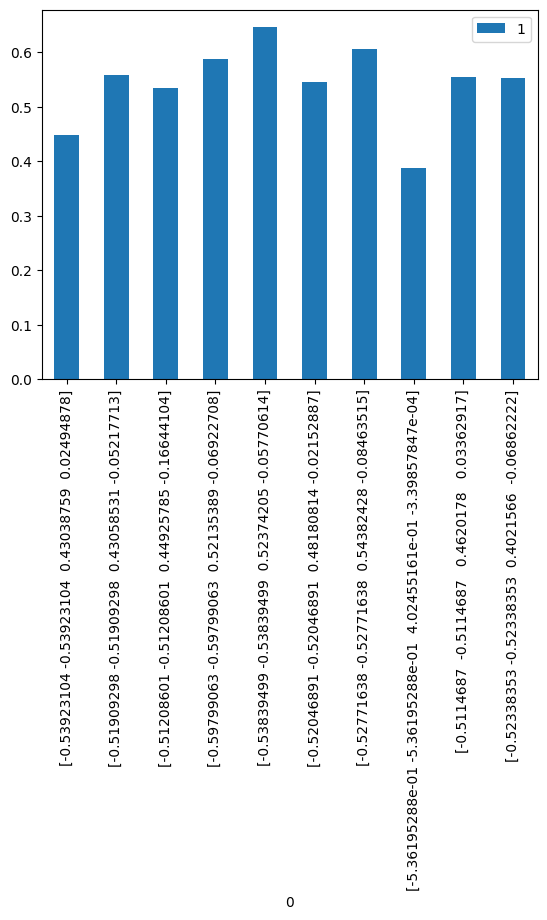

In [43]:
df_scores.plot.bar()

Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step.

In [44]:
def get_percentiles(value: float, percentiles: List[float]):
    """
    :param value: the value to get the percentiles from
    :param percentiles: the percentiles to get
    :return: the percentiles of the value
    """
    return np.percentile(value, percentiles)

for coef in beta_coefficients.T:
    print(get_percentiles(coef, [2.5, 97.5]))

[-0.58476972 -0.51160759]
[-0.58476972 -0.51160759]
[0.40222378 0.53930577]
[-0.14803471  0.03167609]


In [45]:
e2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     55.79
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.48e-17
Time:                        09:36:00   Log-Likelihood:                -63.450
No. Observations:                 100   AIC:                             132.9
Df Residuals:                      97   BIC:                             140.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x1            -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x2             0.4650      0.044     10.552      0.000       0.378       0.553
x3            -0.0321      0.044     -0.731      0.466      -0.119       0.055
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.382
Skew:                          -0.102   Prob(JB):                        0.826
Kurtosis:                       3.224   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The values of the confidence interval are very close:
- [-0.58476972 -0.51160759] vs [-0.575	-0.483]
- [-0.58476972 -0.51160759] vs [-0.575	-0.483]
- [0.40222378 0.53930577] vs [0.378	0.553]
- [-0.14803471  0.03167609] vs [-0.119	0.055]

Increase the number of bootstrap samples B and repeat steps of **e3**. What you observe?

<Axes: xlabel='0'>

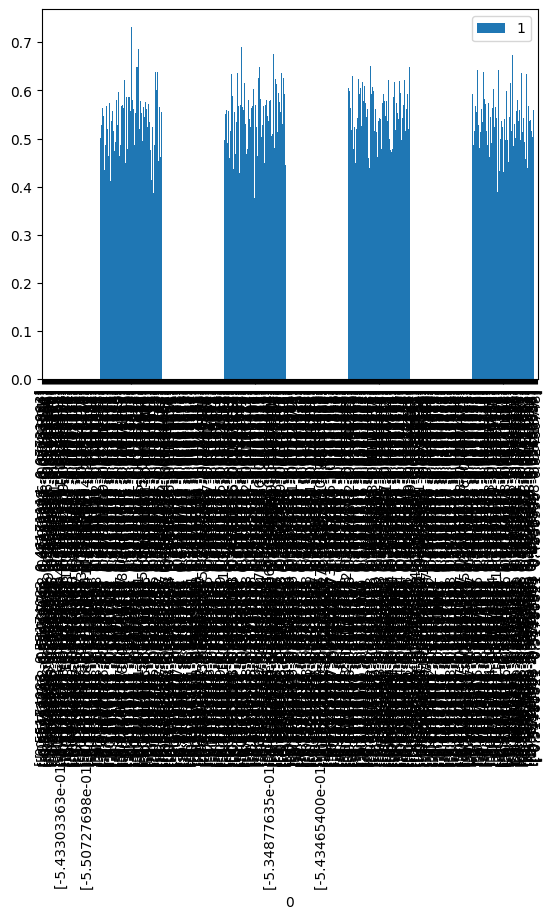

In [46]:
samples = Bootstrap.get_n_samples(X, y, 500)
models = Bootstrap.fit_models(samples)

# get the beta coefficients for each model
beta_coefficients = np.array([model.params for model in models])

# get the confidence interval for each beta coefficient
confidence_intervals = np.array([model.conf_int() for model in models])

# accuracy of each model
accuracies = np.array([model.rsquared for model in models])

labels = [str(beta) for beta in beta_coefficients]
df_scores = pd.DataFrame(data=[labels, accuracies]).T
df_scores.set_index(0, inplace=True)
df_scores

df_scores.plot.bar()

In [47]:
for coef in beta_coefficients.T:
    print(get_percentiles(coef, [2.5, 97.5]))

[-0.58047085 -0.48510857]
[-0.58047085 -0.48510857]
[0.38650877 0.55386952]
[-0.11103675  0.05350581]


In [48]:
e2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     55.79
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.48e-17
Time:                        09:36:03   Log-Likelihood:                -63.450
No. Observations:                 100   AIC:                             132.9
Df Residuals:                      97   BIC:                             140.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x1            -0.5294      0.023    -22.809      0.000      -0.575      -0.483
x2             0.4650      0.044     10.552      0.000       0.378       0.553
x3            -0.0321      0.044     -0.731      0.466      -0.119       0.055
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.382
Skew:                          -0.102   Prob(JB):                        0.826
Kurtosis:                       3.224   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Get get even closer to the condifence interval values we got in **e2** step, without using the bootstrap method.